In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 59s 3us/step


In [8]:
#useful to know how to handle that
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i in range (len(sequences)):
        for j in range (len(sequences[i])): 
            results[i][sequences[i][j]] = 1. #to be float
    return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


In [10]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,))) 
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-10-02 20:00:25.090881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [13]:
model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 80ms/step - loss: 0.5191 - acc: 0.7889 - val_loss: 0.4027 - val_acc: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3146 - acc: 0.9015 - val_loss: 0.3131 - val_acc: 0.8814
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2262 - acc: 0.9283 - val_loss: 0.2825 - val_acc: 0.8879
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1773 - acc: 0.9427 - val_loss: 0.2889 - val_acc: 0.8841
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1446 - acc: 0.9528 - val_loss: 0.2995 - val_acc: 0.8808
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1167 - acc: 0.9653 - val_loss: 0.3259 - val_acc: 0.8753
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1004 - acc: 0.9697 - val_loss: 0.3161 - val_acc: 0.8826
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0817 - a

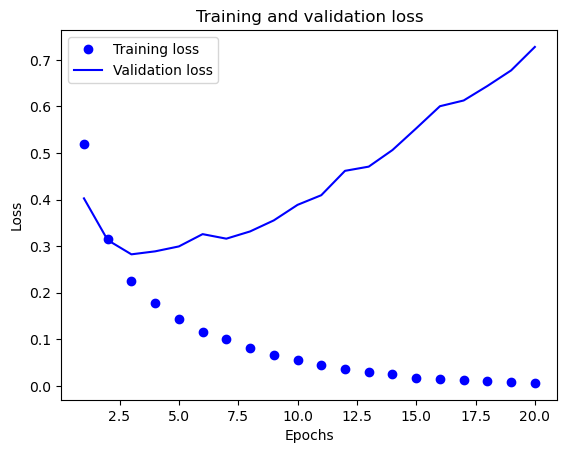

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

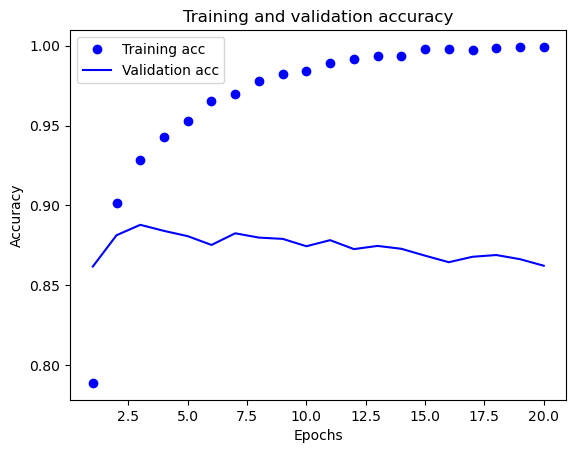

In [17]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()